In [65]:
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt 

In [66]:
#Loads in Path
categories_csv = Path("Resources/amazon_categories.csv")
products_csv = Path("Resources/amazon_products.csv")

#Reads in file 
categories_df = pd.read_csv(categories_csv)
products_df = pd.read_csv(products_csv)

In [67]:
categories_df.rename(columns={"id": "category_id"}, inplace=True)

In [71]:
all_categories_df = pd.merge(categories_df,products_df, on='category_id')

all_categories_df.head()

,category_id,category_name,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth
0,1,Beading & Jewelry Making,B08YNTXFJG,Duufin 120 Pieces Acrylic Keychain Blanks Set ...,https://m.media-amazon.com/images/I/71czFH2QUM...,https://www.amazon.com/dp/B08YNTXFJG,4.7,510,9.99,0.0,False,50
1,1,Beading & Jewelry Making,B08DXSF5PZ,"DIY Tray Silicone Resin Mold, Oval Epoxy Resin...",https://m.media-amazon.com/images/I/71ZnrCHA49...,https://www.amazon.com/dp/B08DXSF5PZ,4.6,584,8.99,0.0,False,0
2,1,Beading & Jewelry Making,B096JGXQN5,"GTOTd I Love Rock and Roll Pins Set(18 Pack,2....",https://m.media-amazon.com/images/I/71SOJXp-wJ...,https://www.amazon.com/dp/B096JGXQN5,4.5,245,12.79,0.0,False,50
3,1,Beading & Jewelry Making,B0BZXW1ZGS,Xuhal 100 Pack Plastic Ring Sizer Bulk Reusabl...,https://m.media-amazon.com/images/I/81qD7tFV+r...,https://www.amazon.com/dp/B0BZXW1ZGS,5.0,1,16.99,0.0,False,0
4,1,Beading & Jewelry Making,B0BR8B472F,"Large Dice Resin Molds, 2 Styles Silicone Dice...",https://m.media-amazon.com/images/I/71uDVuhf71...,https://www.amazon.com/dp/B0BR8B472F,4.4,10,15.99,0.0,False,50


In [76]:
#Groups the data by category name 

#Reduces columns to only have these fields in the new DB 
#reducedColumns = ["category_id","category_name","stars","reviews","price", "listPrice",
                #  "isBestSeller","boughtInLastMonth"]

reducedColumns = ["category_name","stars","reviews"]

clean_category_df = all_categories_df[reducedColumns]

clean_category_df.head()


,category_name,stars,reviews
0,Beading & Jewelry Making,4.7,510
1,Beading & Jewelry Making,4.6,584
2,Beading & Jewelry Making,4.5,245
3,Beading & Jewelry Making,5.0,1
4,Beading & Jewelry Making,4.4,10


In [78]:
stars_per_category = clean_category_df.groupby(['category_name']).mean()

stars_per_category.head()

,stars,reviews
category_name,,
Abrasive & Finishing Products,3.489868,0.324774
Accessories & Supplies,4.419593,0.000000
Additive Manufacturing Products,3.105893,127.049613
Arts & Crafts Supplies,4.221737,613.629496
"Arts, Crafts & Sewing Storage",3.152147,0.000000


In [156]:
highest_rated_categories = stars_per_category.sort_values(by="stars", ascending=False)

#Creates a variable for the max 10 category name with stars 
top_10 = highest_rated_categories.head(10)

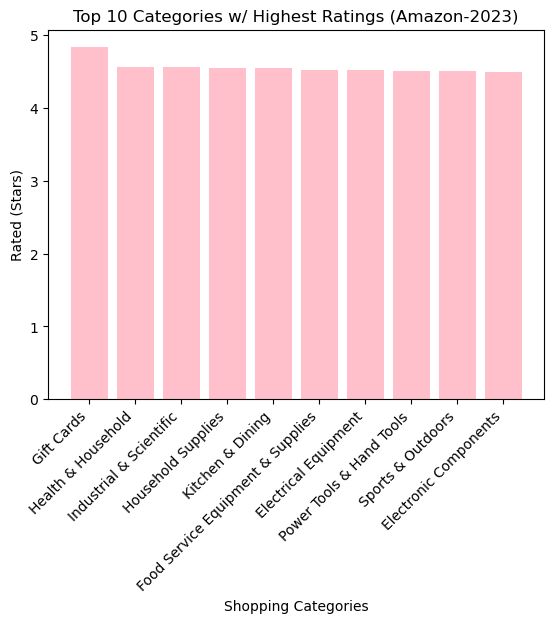

In [158]:
x_axis = top_10.index
y_axis = top_10["stars"]
tick_locations = list(range(len(x_axis))) 

#plots the bar chart
plt.bar(tick_locations, y_axis, color="pink");

#plots the x_axis using tick_locations and horizontally aligns them to the right
plt.xticks(tick_locations, x_axis, rotation=45, ha="right");

plt.title("Top 10 Categories w/ Highest Ratings (Amazon-2023)")
plt.xlabel("Shopping Categories")
plt.ylabel("Rated (Stars)");


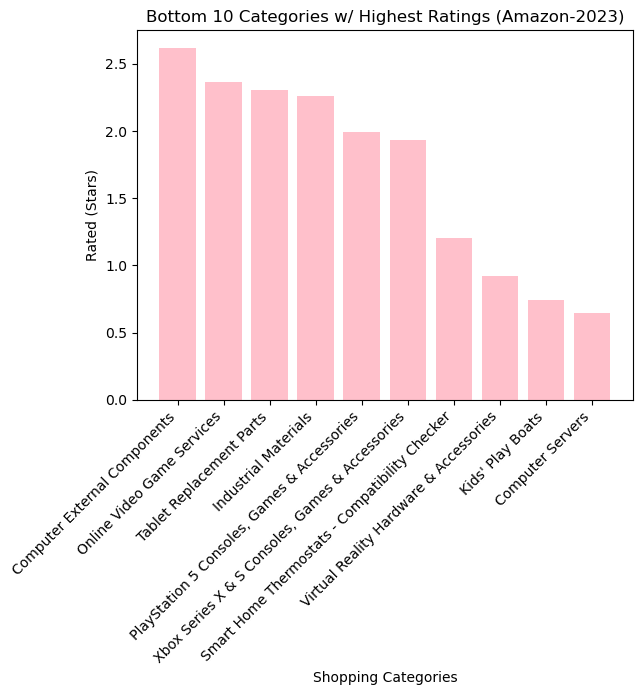

In [164]:
lowest_rated_categories = stars_per_category.sort_values(by="stars", ascending=True)

#Creates a variable for the max 10 category name with stars 
bottom_10 = highest_rated_categories.tail(10)


x_axis = bottom_10.index
y_axis = bottom_10["stars"]
tick_locations = list(range(len(x_axis))) 

#plots the bar chart
plt.bar(tick_locations, y_axis, color="pink");

#plots the x_axis using tick_locations and horizontally aligns them to the right
plt.xticks(tick_locations, x_axis, rotation=45, ha="right");

plt.title("Bottom 10 Categories w/ Highest Ratings (Amazon-2023)")
plt.xlabel("Shopping Categories")
plt.ylabel("Rated (Stars)");